In [10]:
%matplotlib widget
import importlib
import sys
import matplotlib.pyplot as plt
import numpy as np
import os
sys.path.append("..")       # to make the upper folder visible
import src
_ = importlib.reload(src)   # this make changes in the src package immediately effective without restarting the kernel

# folder path
dirPath = "../data/raw/1st_test_IMSBearing/"
fileName= '2003.10.22.12.06.24'

snap=src.data.snapshot()
snap.readImsFile(path=dirPath+fileName, variables="Bearing 3 x")
samplFreq=20000 #hz


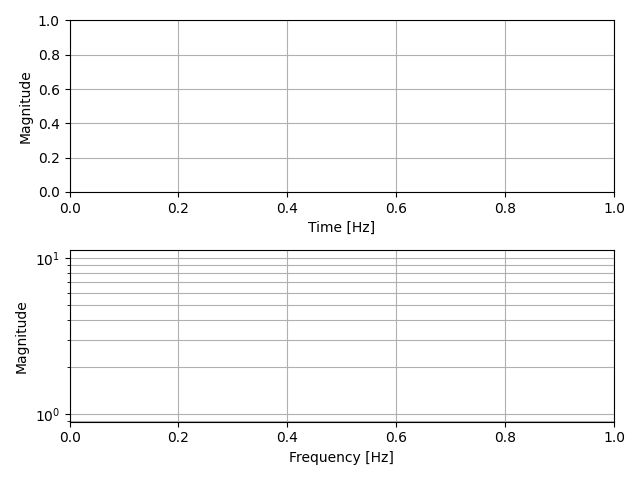

In [11]:
# plotting
fig, axes = plt.subplots(nrows=2, ncols=1)
for ax in axes.flat:
    ax.set_axisbelow(True)
    ax.grid(True,'both','both')
    ax.set_ylabel('Magnitude')
axes[1].set_yscale('log')
axes[0].set_xlabel('Time [Hz]');axes[1].set_xlabel('Frequency [Hz]')
plt.tight_layout()


In [12]:
snap.rawData['time']

0        0.000000
1        0.000049
2        0.000098
3        0.000146
4        0.000195
           ...   
20475    0.999805
20476    0.999854
20477    0.999902
20478    0.999951
20479    1.000000
Name: time, Length: 20480, dtype: float64

In [13]:
#performing fast fourier trasfotm
# no preprocessing
FFT, freqs, prepSignal = src.features.FFT(snap.rawData["Bearing 3 x"],samplFreq,preproc=None)
axes[0].plot(snap.rawData['time'], prepSignal, alpha=0.2)
axes[1].scatter(freqs, FFT,s=0.5, alpha=0.2)
# Hann window preprocessing
FFT, freqs, prepSignal = src.features.FFT(snap.rawData["Bearing 3 x"],samplFreq,preproc='Hann')
axes[0].plot(snap.rawData['time'], prepSignal, alpha=0.2)
axes[1].scatter(freqs, FFT,s=0.5, alpha=0.2)
# Hamming window preprocessing
FFT, freqs, prepSignal = src.features.FFT(snap.rawData["Bearing 3 x"],samplFreq,preproc='Hamming')
axes[0].plot(snap.rawData['time'], prepSignal, alpha=0.2)
axes[1].scatter(freqs, FFT,s=0.5, alpha=0.2)
# Flip window preprocessing
FFT, freqs, prepSignal = src.features.FFT(snap.rawData["Bearing 3 x"],samplFreq,preproc='Flip')
axes[0].plot(np.linspace(0,2*snap.rawData['time'].iloc[-1],len(prepSignal)), prepSignal, alpha=0.2)
axes[1].scatter(freqs, FFT,s=0.5, alpha=0.2)